In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import moment

from collections import Counter
from gensim.models.ldamodel import LdaModel 

In [2]:
def scatterplot(X, y, data):
    _ = sns.regplot(x=X, y= y, data = data, color = 'r', ci = None)
    plt.title('Scatter Plot for '+X+ 'vs.'+y)
    plt.show()
    #Compute the covariance matrix
    cov_mat = np.cov(data[[X, y]].values, rowvar = False)
    print('covariance =', cov_mat[1][0])

In [42]:
def result_med(type):
    count = []
    answerrate = []
    answercount_med = []
    viewCount_med = []
    Time_AA_med = []

    for i in range(1,41):

        df_temp = df[df[type] == i]

        count.append(len(df_temp))
        answercount_med.append(df_temp["AnswerCount"].median())
        viewCount_med.append(df_temp["ViewCount"].median())
        Time_AA_med.append(df_temp["Time_AA"].median())

        df_ans = df_temp[df_temp["AcceptedAnswerId"].notnull()]
        answerrate.append(len(df_ans)/len(df_temp))
        
    df_res = pd.DataFrame()
    df_res["count"] = count
    df_res["answerrate"] = answerrate
    df_res["answercount_med"] = answercount_med
    df_res["viewCount_med"] = viewCount_med
    df_res["Time_AA_med"] = Time_AA_med
    
    for c in df_res.columns:
        print(c)
        print(ss.shapiro(df_res[c]),'\n')
    
    print('correlation_mat for', type)
    correlation_mat = df_res.corr(method='spearman')
    sns.heatmap(correlation_mat, annot = True)
    plt.show()
    
    return df_res

In [20]:
def result_mean(type):
    count = []
    answerrate = []
    answercount_mean = []
    viewCount_mean = []
    Time_AA_mean = []

    for i in range(1,41):

        df_temp = df[df[type] == i]

        count.append(len(df_temp))
        answercount_mean.append(df_temp["AnswerCount"].mean())
        viewCount_mean.append(df_temp["ViewCount"].mean())
        Time_AA_mean.append(df_temp["Time_AA"].mean())

        df_ans = df_temp[df_temp["AcceptedAnswerId"].notnull()]
        answerrate.append(len(df_ans)/len(df_temp))
        
    df_res = pd.DataFrame()
    df_res["count"] = count
    df_res["answerrate"] = answerrate
    df_res["answercount_mean"] = answercount_mean
    df_res["viewCount_mean"] = viewCount_mean
    df_res["Time_AA_mean"] = Time_AA_mean
    
    for c in df_res.columns:
        print(c)
        print(ss.shapiro(df_res[c]),'\n')
    
    print('correlation_mat for', type)
    correlation_mat = df_res.corr(method='spearman')
    sns.heatmap(correlation_mat, annot = True)
    plt.show()
    
    return df_res

In [25]:
def result(type):
    count = []
    answerrate = []
    answercount_med = []
    viewCount_med = []
    Time_AA_med = []
    answercount_mean = []
    viewCount_mean = []
    Time_AA_mean = []

    for i in range(1,41):

        df_temp = df[df[type] == i]

        count.append(len(df_temp))
        answercount_med.append(df_temp["AnswerCount"].median())
        viewCount_med.append(df_temp["ViewCount"].median())
        Time_AA_med.append(df_temp["Time_AA"].median())
        
        answercount_mean.append(df_temp["AnswerCount"].mean())
        viewCount_mean.append(df_temp["ViewCount"].mean())
        Time_AA_mean.append(df_temp["Time_AA"].mean())

        df_ans = df_temp[df_temp["AcceptedAnswerId"].notnull()]
        answerrate.append(len(df_ans)/len(df_temp))
        
    df_res = pd.DataFrame()
    df_res["count"] = count
    df_res["answerrate"] = answerrate
    df_res["answercount_med"] = answercount_med
    df_res["viewCount_med"] = viewCount_med
    df_res["Time_AA_med"] = Time_AA_med
    df_res["answercount_mean"] = answercount_mean
    df_res["viewCount_mean"] = viewCount_mean
    df_res["Time_AA_mean"] = Time_AA_mean
    
    
    for c in df_res.columns:
        print(c)
        print(ss.shapiro(df_res[c]),'\n')
    
    print('correlation_mat for', type)
    correlation_mat = df_res.corr(method='spearman')
    sns.heatmap(correlation_mat, annot = True)
    plt.show()
    
    return df_res

In [5]:
df = pd.read_csv("Q_pred50.csv")

/Users/wuyunwei/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
df[["AnswerCount", "ViewCount","Time_AA"]].describe()

,AnswerCount,ViewCount,Time_AA
count,948669.000000,9.486690e+05,4.958030e+05
mean,1.435188,2.969094e+03,7.969528e+05
std,1.364856,3.282208e+04,7.546090e+06
min,0.000000,3.000000e+00,0.000000e+00
25%,1.000000,6.800000e+01,5.280000e+02
50%,1.000000,2.460000e+02,1.721000e+03
75%,2.000000,1.048000e+03,1.143800e+04
max,191.000000,6.062302e+06,3.646184e+08


In [32]:
m2 = moment(df[["AnswerCount", "ViewCount", "Time_AA"]], moment=2)
m3 = moment(df[["AnswerCount", "ViewCount", "Time_AA"]], moment=3)
m4 = moment(df[["AnswerCount", "ViewCount", "Time_AA"]], moment=4)
skew_f = m3 / pow(pow(m2, 0.5), 3)
print("skewness = ", skew_f)
kurtosis_f = m4 / pow(m2, 2)
print("kurtosis = ", kurtosis_f) 
print('\n')

df_Diff = df[df["Time_AA"].notnull()]
m2 = moment(df_Diff["Time_AA"], moment=2)
m3 = moment(df_Diff["Time_AA"], moment=3)
m4 = moment(df_Diff["Time_AA"], moment=4)
skew_f = m3 / pow(pow(m2, 0.5), 3)
print("skewness = ", skew_f)
kurtosis_f = m4 / pow(m2, 2)
print("kurtosis = ", kurtosis_f) 

skewness =  [ 7.86975797 67.29097272         nan]
kurtosis =  [ 471.38234654 7303.99785369           nan]


skewness =  18.05810866626849
kurtosis =  442.1406575758793


In [50]:
TBAA_RL.describe()

,count,answerrate,answercount_med,viewCount_med,Time_AA_med,answercount_mean,viewCount_mean,Time_AA_mean
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,4.000000e+01
mean,23716.725000,0.518848,1.100000,276.225000,3463.437500,1.381816,2782.389095,8.336447e+05
std,21550.872323,0.080359,0.303822,121.293084,3711.414695,0.264434,1024.392113,4.865324e+05
min,2169.000000,0.325070,1.000000,95.000000,577.000000,0.998656,1382.908847,1.484987e+05
25%,13051.500000,0.476736,1.000000,199.750000,1367.250000,1.213207,2011.444651,5.183913e+05
50%,18968.000000,0.508863,1.000000,237.000000,2285.000000,1.281617,2648.177979,7.488972e+05
75%,27842.750000,0.578250,1.000000,373.000000,4172.375000,1.498421,3313.374789,1.087055e+06
max,121845.000000,0.684187,2.000000,582.500000,21190.000000,2.156139,5579.607309,2.101893e+06


count
ShapiroResult(statistic=0.6923113465309143, pvalue=7.297856541299552e-08) 

answerrate
ShapiroResult(statistic=0.9820128679275513, pvalue=0.7635647654533386) 

answercount_med
ShapiroResult(statistic=0.34482651948928833, pvalue=3.740685712572134e-12) 

viewCount_med
ShapiroResult(statistic=0.9567149877548218, pvalue=0.12919655442237854) 

Time_AA_med
ShapiroResult(statistic=0.6518093347549438, pvalue=1.716094288894965e-08) 

correlation_mat for TBAA_RL_Pred


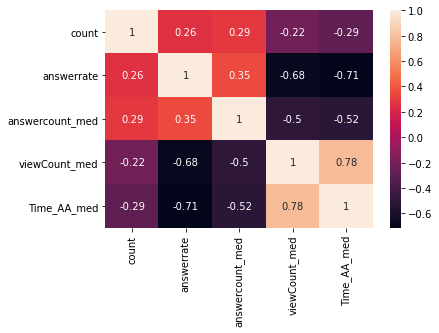

In [43]:
TBAA_RL_med = result_med("TBAA_RL_Pred")

count
ShapiroResult(statistic=0.6923113465309143, pvalue=7.297856541299552e-08) 

answerrate
ShapiroResult(statistic=0.9820128679275513, pvalue=0.7635647654533386) 

answercount_mean
ShapiroResult(statistic=0.8791658282279968, pvalue=0.0004998057265765965) 

viewCount_mean
ShapiroResult(statistic=0.9359487891197205, pvalue=0.025298962369561195) 

Time_AA_mean
ShapiroResult(statistic=0.94631028175354, pvalue=0.05665105581283569) 

correlation_mat for TBAA_RL_Pred


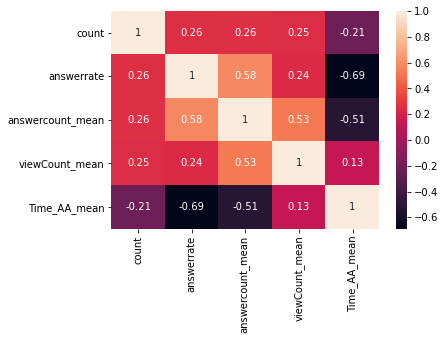

In [38]:
TBAA_RL2 = result_mean("TBAA_RL_Pred")

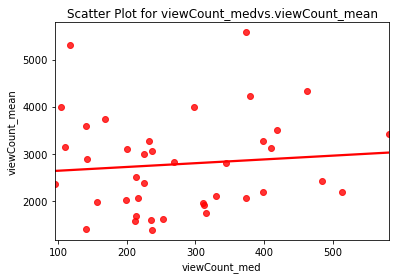

covariance = 11787.568048165922


In [47]:
scatterplot('viewCount_med', 'viewCount_mean', TBAA_RL)

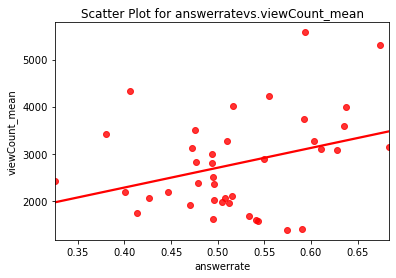

covariance = 27.1493851638399


In [48]:
scatterplot('answerrate', 'viewCount_mean', TBAA_RL)

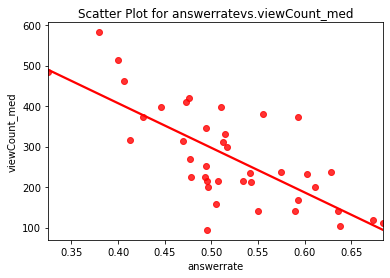

covariance = -7.113445459737952


In [49]:
scatterplot('answerrate', 'viewCount_med', TBAA_RL)

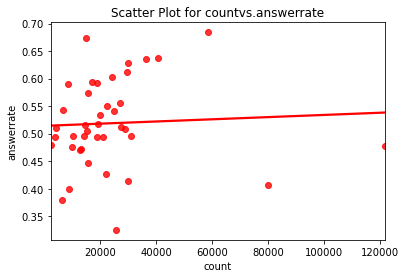

covariance = 92.13330276779946


In [16]:
scatterplot('count', 'answerrate', TBAA_RL)

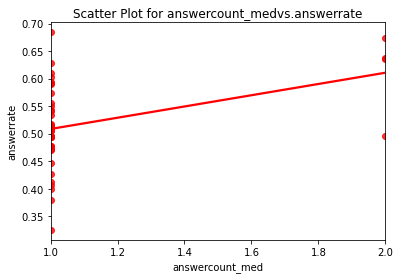

covariance = 0.009431041693670839


In [17]:
scatterplot('answercount_med', 'answerrate', TBAA_RL)

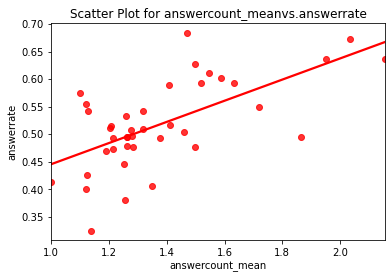

covariance = 0.01344950700600946


In [18]:
scatterplot('answercount_mean', 'answerrate', TBAA_RL)

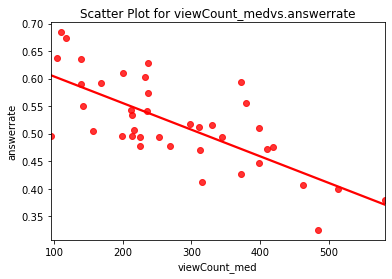

covariance = -7.113445459737952


In [19]:
scatterplot('viewCount_med', 'answerrate', TBAA_RL)

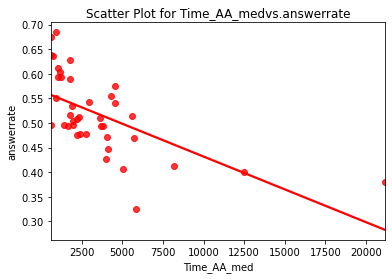

covariance = -183.643709564837


In [20]:
scatterplot('Time_AA_med', 'answerrate', TBAA_RL)

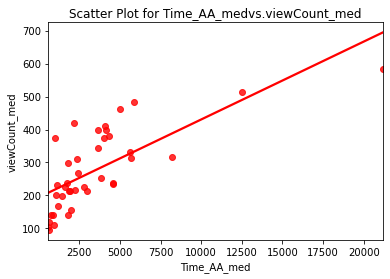

covariance = 325352.62980769237


In [21]:
scatterplot('Time_AA_med', 'viewCount_med', TBAA_RL)